# Project: Investigate a Dataset (FBI open up!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> ## information about the data set 

>The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to
determine whether a prospective
buyer is eligible to buy firearms or
explosives. Gun shops call into this
system to ensure that each customer
does not have a criminal record or
isn’t otherwise ineligible to make a
purchase. The data has been
supplemented with state level data
from census.gov.

> * The NICS data is found in one
sheet of an .xlsx file. It contains
the number of firearm checks by
month, state, and type.
> * The U.S. census data is found in a .csv file. It contains several
variables at the state level. Most
variables just have one data
point per state (2016), but a few
have data for more than one
year.

> ## questions to ask
* What census data is most associated with high gun per capita?
* Which states have had the highest growth in gun registrations?
* What is the overall trend of gun purchases?

>## more questions to ask 
* is there is a relationship betweet the month and the guns bought?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
#import needed libiraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

## steps taken
* look at size of each data set 
* look at the content of each data set and see it's type
* see the missing values and trying to see if there is some patterns then after that see what to do with the missing value
* see the data types that python reads 


### General Properties

In [3]:
#plz put your path of the data here
import os
path = 'E:/career/Dataa/udacity/Advanced Data Analysis Nanodegree Program/2. Introduction to Data Analysis/03 Investigate A Dataset Project/data'
os.chdir(path)
print('path is:', os.getcwd())
print('the data there:' , os.listdir())

path is: E:\career\Dataa\udacity\Advanced Data Analysis Nanodegree Program\2. Introduction to Data Analysis\03 Investigate A Dataset Project\data
the data there: ['Data.zip', 'gun_data.xlsx', 'New folder', 'U.S. Census Data.csv']


In [4]:
#check if the data is there to start the good work mate <3
if os.path.exists('gun_data.xlsx') and os.path.exists('U.S. Census Data.csv'):
    print('you are ok to start')
else:
    from zipfile import ZipFile
    import urllib.request
    datalink = "https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a5623_ncis-and-census-data/ncis-and-census-data.zip"
    urllib.request.urlretrieve(datalink, 'Data.zip')
    # Create a ZipFile Object and load sample.zip in it
    with ZipFile('Data.zip', 'r') as zipObj:
       # Extract all the contents of zip file in current directory
       zipObj.extractall()
    print('the data is downloaded and unziped u r good to go')

you are ok to start


In [5]:
#load the data into work space 
df_census = pd.read_csv('U.S. Census Data.csv')

In [6]:
df_gun = pd.read_excel('gun_data.xlsx')

# General Properties census 
* rows and columns Number 
* data stored in each column 
* missing values 
* duplicated values

In [7]:
print('df_census shape is:' , df_census.shape)

df_census shape is: (85, 52)


In [8]:
#alot of columns on each data set alone 
#lets see them 
for i, v in enumerate(df_census.columns):
    print(i, v)

0 Fact
1 Fact Note
2 Alabama
3 Alaska
4 Arizona
5 Arkansas
6 California
7 Colorado
8 Connecticut
9 Delaware
10 Florida
11 Georgia
12 Hawaii
13 Idaho
14 Illinois
15 Indiana
16 Iowa
17 Kansas
18 Kentucky
19 Louisiana
20 Maine
21 Maryland
22 Massachusetts
23 Michigan
24 Minnesota
25 Mississippi
26 Missouri
27 Montana
28 Nebraska
29 Nevada
30 New Hampshire
31 New Jersey
32 New Mexico
33 New York
34 North Carolina
35 North Dakota
36 Ohio
37 Oklahoma
38 Oregon
39 Pennsylvania
40 Rhode Island
41 South Carolina
42 South Dakota
43 Tennessee
44 Texas
45 Utah
46 Vermont
47 Virginia
48 Washington
49 West Virginia
50 Wisconsin
51 Wyoming


In [9]:
#looks like its the fact, and the facts notes and the 50 state of U S 
#so what is facts ?
i = 0
for l in df_census['Fact']:
    print(i , l)
    i += 1
#looks like fact are pop and just quetion were asked to them and they comapre it to the states for some reason

0 Population estimates, July 1, 2016,  (V2016)
1 Population estimates base, April 1, 2010,  (V2016)
2 Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3 Population, Census, April 1, 2010
4 Persons under 5 years, percent, July 1, 2016,  (V2016)
5 Persons under 5 years, percent, April 1, 2010
6 Persons under 18 years, percent, July 1, 2016,  (V2016)
7 Persons under 18 years, percent, April 1, 2010
8 Persons 65 years and over, percent,  July 1, 2016,  (V2016)
9 Persons 65 years and over, percent, April 1, 2010
10 Female persons, percent,  July 1, 2016,  (V2016)
11 Female persons, percent, April 1, 2010
12 White alone, percent, July 1, 2016,  (V2016)
13 Black or African American alone, percent, July 1, 2016,  (V2016)
14 American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
15 Asian alone, percent, July 1, 2016,  (V2016)
16 Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
17 Two or More Races, percent, 

In [10]:
#look at the other data in the DF 
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [11]:
#it's numbers related to the question being asked(fact) and the fact note apear to have alot of missing vlues 
#lets see there types
df_census.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [12]:
#that's not ok as the number are treated as strings we will need to clean this up 
#now lets see the missing values for each row 
df_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [13]:
#the fixed number 20 is abit wired to me so i wanted to see if they all in the same postion
#i picked 2 random states and checked and lets see 
(df_census.California.isnull() == df_census.Wyoming.isnull()).all()

True

In [14]:
#ok lets check all of the nan valus for the state are they the same 
c = 2
for c in range(2,51):
    if (df_census.iloc[:,c].isnull() != df_census.iloc[:,(c+1)].isnull()).all():
        print('i was wrong')

In [15]:
#now lets see what is in there for the fact and note
df_census.iloc[:,0:2][df_census.California.isnull()]
#i can drop them any time and nothing will change

,Fact,Fact Note
65,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN
67,NaN,NaN
68,Value Notes,NaN
69,1,Includes data not distributed by county.
70,NaN,NaN
71,Fact Notes,NaN
72,(a),Includes persons reporting only one race
73,(b),"Hispanics may be of any race, so also are incl..."
74,(c),Economic Census - Puerto Rico data are not com...


In [16]:
#now how fact can have 5 missing values what is in there for the data what does it mean
df_census[df_census.Fact.isnull()]
#like expected nothing there dead weight
# and lucky for us it will drop with the states nul values 

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# as for the fact note missing value i have 2 options 1 drop the full column
# just fill it with no need to

In [18]:
#lets see the duplicates 
df_census[df_census.duplicated()]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#apears to be in the same range that will drop any how we was gonna drop it any way 

In [20]:
#final look 
df_census.describe()
#this useless we need to make them float first 

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Black or African American alone, percent, July...",(c),"7,576,462",7.30%,50.30%,50.90%,50.30%,3.30%,5.70%,51.60%,...,0.02,0.048,50.40%,2.50%,1.90%,36.30%,"187,677",1.50%,8.20%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


# General Properties guns
* rows and columns Number 
* data stored in each column 
* missing values 
* duplicated values

In [21]:
df_gun.shape

(12485, 27)

In [22]:
for i, v in enumerate(df_gun.columns):
    print(i, v)

0 month
1 state
2 permit
3 permit_recheck
4 handgun
5 long_gun
6 other
7 multiple
8 admin
9 prepawn_handgun
10 prepawn_long_gun
11 prepawn_other
12 redemption_handgun
13 redemption_long_gun
14 redemption_other
15 returned_handgun
16 returned_long_gun
17 returned_other
18 rentals_handgun
19 rentals_long_gun
20 private_sale_handgun
21 private_sale_long_gun
22 private_sale_other
23 return_to_seller_handgun
24 return_to_seller_long_gun
25 return_to_seller_other
26 totals


In [23]:
#i can see some groups like 
#gun type  # prepawn_ #redemption_ #returned_ #rentals_ #private_ #return_to_seller_
#lets see more with an example 
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [24]:
#this a bit tricky lets try and see more of this df 
df_gun.dtypes 
#appears to be all float but sum int we can covert them or leave them as we want 

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [25]:
#now lets see the missing values for each row 
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [26]:
df_gun[df_gun.permit.isnull()].head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
7279,2006-09,Louisiana,NaN,NaN,5948.0,10836.0,NaN,253,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19080
7310,2006-09,Virginia,NaN,NaN,6935.0,11023.0,NaN,242,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18200
7804,2005-12,Virgin Islands,NaN,NaN,22.0,1.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
7859,2005-11,Virgin Islands,NaN,NaN,13.0,2.0,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
7914,2005-10,Virgin Islands,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7969,2005-09,Virgin Islands,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8024,2005-08,Virgin Islands,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8079,2005-07,Virgin Islands,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8134,2005-06,Virgin Islands,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8189,2005-05,Virgin Islands,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [27]:
#lets see the duplicates 
df_gun[df_gun.duplicated()] 

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals


In [28]:
#final look 
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


# cleaning the data

## census
* drop the nan of the states from the data set
* convert the data in census into floats 
* fill the rest NA with **no record**
## gun 
* fill na 
> for gun data set we fill it with mean or with 0 and after looking to the data is seems to vary a lot and the mean values will just make it unreal
* extract the year and month from the data set to be used later on
* group the guns till 2016 alone and guns till 2010 alone 
* see total guns in both years(useless step)
* merge the new grouped guns data sets 
## more to go 
* transpose census data set to make the states are in rows 
* edit the header to the new one 
* clen the columns names with population  from it's noise
* merge the new created guns data sets with the tranposed census



In [29]:
#now lets drop the nan of the states from the data set 
df_census = df_census[df_census.Alabama.notnull()]

In [30]:
#lest convert the data in census into floats 
#we start after fact and note 
col = df_census.iloc[:,2:].columns
for c in col:
    df_census[c].replace(regex=True,inplace=True,to_replace=r'\D',value=r'') # remove all the non digit character
    df_census[c]=pd.to_numeric(df_census[c], downcast='float', errors='ignore') #convert them to numerc

In [31]:
#fill the rest with no record 
df_census.fillna('No record', inplace = True)

In [32]:
df_census.isnull().all().any()

False

In [33]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",No record,4863300.0,741894,6931071.0,2988248.0,39250016.0,5540545.0,3576452.0,952065.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594,8411808.0,7288000.0,1.8311e+06,5778708.0,585501
1,"Population estimates base, April 1, 2010, (V2...",No record,4780131.0,710249,6392301.0,2916025.0,37254520.0,5029324.0,3574114.0,897936.0,...,814195.0,6346298.0,25146100.0,2763888.0,625741,8001041.0,6724545.0,1.85301e+06,5687289.0,563767
2,"Population, percent change - April 1, 2010 (es...",No record,170.0,450,840.0,250.0,540.0,1020.0,10.0,600.0,...,63.0,48.0,1080.0,1040.0,20,510.0,840.0,120,160.0,390
3,"Population, Census, April 1, 2010",No record,4779736.0,710231,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,...,814180.0,6346105.0,25145560.0,2763885.0,625741,8001024.0,6724540.0,1.85299e+06,5686986.0,563626
4,"Persons under 5 years, percent, July 1, 2016, ...",No record,600.0,730,630.0,640.0,630.0,610.0,520.0,580.0,...,71.0,61.0,720.0,830.0,490,610.0,620.0,550,580.0,650


In [34]:
df_census.dtypes

Fact               object
Fact Note          object
Alabama           float64
Alaska             object
Arizona           float64
Arkansas          float64
California        float64
Colorado          float64
Connecticut       float64
Delaware          float64
Florida           float64
Georgia           float64
Hawaii             object
Idaho             float64
Illinois          float64
Indiana           float64
Iowa              float64
Kansas            float64
Kentucky          float64
Louisiana         float64
Maine              object
Maryland          float64
Massachusetts     float64
Michigan           object
Minnesota         float64
Mississippi       float64
Missouri          float64
Montana           float64
Nebraska          float64
Nevada            float64
New Hampshire     float64
New Jersey        float64
New Mexico        float64
New York          float64
North Carolina    float64
North Dakota      float64
Ohio              float64
Oklahoma          float64
Oregon      

In [35]:
#for gun data set we fill it with mean or with 0
#after looking to the data is seems to vary a lot and the mean values will just make it unreal
# for c in df1.iloc[:,np.r_[2:]].columns:
#     df_gun[c].fillna(df_gun[c].mean(), inplace = True)

df_gun.iloc[:,2:26].fillna(0, inplace = True)


In [36]:
df_gun.isnull().all().any() 

False

In [37]:
df_census.describe()
#now we can see some data here but this dercripe is mainly usless as the Fact is just random things 

,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Idaho,...,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Virginia,Washington,Wisconsin
count,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,...,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01
mean,5.723165e+06,6.216385e+06,3.243238e+06,4.710430e+07,6.066578e+06,6.458199e+06,1.207981e+06,1.913741e+07,1.110225e+07,1.646267e+06,...,1.607585e+07,1.261028e+06,5.022408e+06,1.195242e+06,8.348718e+06,4.044326e+07,3.269196e+06,8.772856e+06,8.978025e+06,8.183319e+06
std,1.999945e+07,1.956994e+07,1.080003e+07,1.583482e+08,2.006477e+07,2.462499e+07,4.270702e+06,6.341391e+07,3.649988e+07,4.943183e+06,...,5.333694e+07,4.207580e+06,1.710154e+07,4.020516e+06,2.802108e+07,1.420091e+08,1.059950e+07,2.910887e+07,3.004716e+07,2.900423e+07
min,1.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,9.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.600000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,4.900000e+01,1.000000e+01,5.300000e+01,1.000000e+01
25%,9.440000e+02,1.190000e+03,7.300000e+02,1.360000e+03,1.002000e+03,1.180000e+03,1.018000e+03,1.530000e+03,1.070000e+03,9.000000e+02,...,9.500000e+01,1.650000e+02,1.670000e+02,8.400000e+01,1.570000e+02,1.200000e+03,9.500000e+02,1.116000e+03,1.014000e+03,6.700000e+02
50%,6.870000e+03,6.280000e+03,7.290000e+03,6.310000e+03,6.860000e+03,6.770000e+03,6.310000e+03,6.530000e+03,6.230000e+03,8.240000e+03,...,8.400000e+02,8.660000e+02,8.470000e+02,8.340000e+02,8.470000e+02,6.430000e+03,7.880000e+03,6.620000e+03,6.950000e+03,8.170000e+03
75%,3.220250e+05,4.519510e+05,1.983800e+05,3.176341e+06,4.695240e+05,2.728090e+05,7.121300e+04,1.846686e+06,8.005850e+05,1.309730e+05,...,8.188580e+05,7.983700e+04,3.031370e+05,7.422800e+04,4.624140e+05,2.057218e+06,2.188260e+05,5.764460e+05,4.614010e+05,3.799340e+05
max,1.248098e+08,1.026714e+08,6.271292e+07,8.569542e+08,1.175396e+08,1.619622e+08,2.259738e+07,3.370745e+08,1.748394e+08,2.111962e+07,...,2.576269e+08,2.231039e+07,9.916084e+07,2.041106e+07,1.399605e+08,7.026031e+08,5.145326e+07,1.657889e+08,1.492588e+08,1.777289e+08


In [38]:
#transpose data set to make the states are in rows 
dfcenusT = df_census.T
dfcenusT = dfcenusT.drop(index = ["Fact Note"]).reset_index()
new_header = dfcenusT.iloc[0] #grab the first row for the header
dfcenusT = dfcenusT[1:] #take the data less the header row
dfcenusT.columns = new_header #set the header row as the df header
dfcenusT.rename(columns={'Fact':'state'},inplace = True)
#change them into floats again 
for c in dfcenusT.columns:
    dfcenusT[c]=pd.to_numeric(dfcenusT[c], downcast='float', errors='ignore')
    
dfcenusT.describe()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
count,50.00,50.00,50.000000,50.00,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000,...,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.00000,5.000000e+01,50.000000,50.00,50.000000
mean,6448926.50,6163127.00,328.100006,6162875.50,480.820007,512.400024,1790.97998,1880.23999,1210.060059,1028.959961,...,5.548918e+05,2.976230e+05,1.971777e+05,1.585531e+05,3.806367e+05,50502.71875,4.817082e+05,4007.020020,6495685.00,29.320000
std,7271769.00,6848463.50,321.988800,6848235.50,250.465012,272.661499,908.27832,961.44574,635.085083,529.786926,...,6.645229e+05,3.540115e+05,2.482425e+05,3.017391e+05,3.618627e+05,52073.87500,5.921109e+05,16820.601562,8831095.00,15.782243
min,585501.00,563767.00,3.000000,563626.00,6.000000,6.000000,197.00000,22.00000,15.000000,129.000000,...,6.242700e+04,3.003900e+04,1.934400e+04,2.354000e+03,3.851000e+04,6470.00000,5.135300e+04,12.000000,75811.00,1.000000
25%,1850105.50,1833003.25,63.250000,1833004.25,482.500000,512.500000,1902.50000,2070.00000,1042.500000,802.500000,...,1.478222e+05,7.734775e+04,4.682475e+04,1.471450e+04,1.310602e+05,15796.50000,1.254088e+05,268.500000,901865.25,17.250000
50%,4559320.00,4436411.50,205.000000,4436369.50,600.000000,635.000000,2225.00000,2350.00000,1500.000000,1245.000000,...,3.535155e+05,1.951455e+05,1.274355e+05,6.306350e+04,2.769725e+05,38051.50000,2.959635e+05,821.000000,5134040.50,29.500000
75%,7198767.75,6680362.00,507.500000,6680312.25,640.000000,680.000000,2345.00000,2455.00000,1610.000000,1380.000000,...,5.933612e+05,3.403212e+05,2.066418e+05,1.301590e+05,4.481730e+05,58253.25000,5.116312e+05,2095.000000,8122572.50,41.750000
max,39250016.00,37254520.00,1080.000000,37253956.00,830.000000,950.000000,3020.00000,3150.00000,1990.000000,1730.000000,...,3.548449e+06,1.852580e+06,1.320085e+06,1.619857e+06,1.819107e+06,252377.00000,3.176341e+06,119550.000000,57064096.00,56.000000


In [39]:
#clen the columns names 
dfcenusT.rename(columns={'Population estimates, July 1, 2016,  (V2016)':'pop in 2016' ,
                        'Population estimates base, April 1, 2010,  (V2016)':'pop in 2010',
                         'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)': 'chane_pop_2010_2016'
                         ,'Population, Census, April 1, 2010': 'pop Census 2010'
                        },inplace = True)

In [40]:
#the guns needs more work we need to group them by year from month and group them by states from year 
#add year column 
df_gun['month'][1].split("-")[0]

'2017'

In [41]:
df_gun['year'] = df_gun['month'].apply(lambda x: x.split("-")[0]).astype(int)
df_gun.head()
df_gun['month'] = df_gun['month'].apply(lambda x: x.split("-")[1]).astype(int)
df_gun.head()
#lets use gun from the start to the year 2016 (that is the normal thing people the pop is cumulative over years, the total gun data not cumulative over years.) sorry for the long sentesc as i was sovling it with afriend and he proved to be super dumpb, shout out to my dump friend XD 

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
0,9,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017
1,9,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017
2,9,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017
3,9,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017
4,9,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017


In [42]:
#guns data till 2016
df_till_2016 = df_gun[df_gun['year'] <= 2016].groupby(['state'])['totals'].sum().reset_index()
df_till_2016.rename(columns={'totals':'total_gun_till_2016'},inplace = True)
#guns data till 2010
df_till_2010 = df_gun[df_gun['year'] <= 2010].groupby(['state'])['totals'].sum().reset_index()
df_till_2010.rename(columns={'totals':'total_gun_till_2010'},inplace = True)
#guns in 2016
df_in_2016 = df_gun[df_gun['year'] == 2016].groupby(['state'])['totals'].sum().reset_index()
df_in_2016.rename(columns={'totals':'total_in_2016'},inplace = True)
#guns data till 2016
df_in_2010 = df_gun[df_gun['year'] == 2010].groupby(['state'])['totals'].sum().reset_index()
df_in_2010.rename(columns={'totals':'total_in_2010'},inplace = True)

In [43]:
from functools import reduce
dfs = [df_till_2016, df_till_2010,df_in_2016,df_in_2010]
gun_year_final = reduce(lambda left,right: pd.merge(left,right,on='state'), dfs)

In [44]:
gun_year_final.head(2)

,state,total_gun_till_2016,total_gun_till_2010,total_in_2016,total_in_2010
0,Alabama,6369316,3062217,616947,308607
1,Alaska,1080741,570905,87647,65909


In [45]:
dfcenusT = gun_year_final.merge(dfcenusT, on='state', how='inner')
dfcenusT.head(2)

,state,total_gun_till_2016,total_gun_till_2010,total_in_2016,total_in_2010,pop in 2016,pop in 2010,chane_pop_2010_2016,pop Census 2010,"Persons under 5 years, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,6369316,3062217,616947,308607,4863300.0,4780131.0,170.0,4779736.0,600.0,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0,1.0
1,Alaska,1080741,570905,87647,65909,741894.0,710249.0,450.0,710231.0,730.0,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0,2.0


In [46]:
dfcenusT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 70 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   state                                                                                   50 non-null     object 
 1   total_gun_till_2016                                                                     50 non-null     int64  
 2   total_gun_till_2010                                                                     50 non-null     int64  
 3   total_in_2016                                                                           50 non-null     int64  
 4   total_in_2010                                                                           50 non-null     int64  
 5   pop in 2016                                                              

In [47]:
dfcenusT.describe()

,total_gun_till_2016,total_gun_till_2010,total_in_2016,total_in_2010,pop in 2016,pop in 2010,chane_pop_2010_2016,pop Census 2010,"Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.00,50.00,50.000000,50.00,50.000000,50.000000,...,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.00000,5.000000e+01,50.000000,50.00,50.000000
mean,5.028341e+06,2.468974e+06,5.481110e+05,2.861985e+05,6448926.50,6163127.00,328.100006,6162875.50,480.820007,512.400024,...,5.548918e+05,2.976230e+05,1.971777e+05,1.585531e+05,3.806367e+05,50502.71875,4.817082e+05,4007.020020,6495685.00,29.320000
std,5.163183e+06,2.349591e+06,6.826073e+05,3.689456e+05,7271769.00,6848463.50,321.988800,6848235.50,250.465012,272.661499,...,6.645229e+05,3.540115e+05,2.482425e+05,3.017391e+05,3.618627e+05,52073.87500,5.921109e+05,16820.601562,8831095.00,15.782243
min,1.883630e+05,9.368800e+04,1.668100e+04,1.053300e+04,585501.00,563767.00,3.000000,563626.00,6.000000,6.000000,...,6.242700e+04,3.003900e+04,1.934400e+04,2.354000e+03,3.851000e+04,6470.00000,5.135300e+04,12.000000,75811.00,1.000000
25%,1.677534e+06,8.801202e+05,1.500798e+05,8.912925e+04,1850105.50,1833003.25,63.250000,1833004.25,482.500000,512.500000,...,1.478222e+05,7.734775e+04,4.682475e+04,1.471450e+04,1.310602e+05,15796.50000,1.254088e+05,268.500000,901865.25,17.250000
50%,3.654920e+06,1.970072e+06,3.212000e+05,1.931225e+05,4559320.00,4436411.50,205.000000,4436369.50,600.000000,635.000000,...,3.535155e+05,1.951455e+05,1.274355e+05,6.306350e+04,2.769725e+05,38051.50000,2.959635e+05,821.000000,5134040.50,29.500000
75%,6.323730e+06,3.023823e+06,6.159565e+05,3.348182e+05,7198767.75,6680362.00,507.500000,6680312.25,640.000000,680.000000,...,5.933612e+05,3.403212e+05,2.066418e+05,1.301590e+05,4.481730e+05,58253.25000,5.116312e+05,2095.000000,8122572.50,41.750000
max,2.634446e+07,1.050854e+07,3.676847e+06,2.385579e+06,39250016.00,37254520.00,1080.000000,37253956.00,830.000000,950.000000,...,3.548449e+06,1.852580e+06,1.320085e+06,1.619857e+06,1.819107e+06,252377.00000,3.176341e+06,119550.000000,57064096.00,56.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that we've trimmed and cleaned your data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. 

### Research Question 1: What census data is most associated with high gun per capita?
lets break the question to be more understadable 
* census == Fact ?
* associated = corr
* gun / capita (total gun/pop?) 
>Per capita income is national income divided by population size.
* we need to find pop values Maybe in Fact?
* lets use gun from the start to the year 2016 (that is the normal thing people the pop is cumulative over years, the total gun data not cumulative over years.) sorry for the long sentesc as i was sovling it with afriend and he proved to be super dumpb, shout out to my dump friend XD 

In [48]:
#creat the gun / capita 
dfcenusT['Gun_Capital_till_2016'] = dfcenusT['total_gun_till_2016']/dfcenusT['pop in 2016']

In [49]:
#view the highest 
dfcenusT.sort_values(by=['Gun_Capital_till_2016'], ascending = False).head(5)

,state,total_gun_till_2016,total_gun_till_2010,total_in_2016,total_in_2010,pop in 2016,pop in 2010,chane_pop_2010_2016,pop Census 2010,"Persons under 5 years, percent, July 1, 2016, (V2016)",...,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,Gun_Capital_till_2016
16,Kentucky,26344458,10508535,3676847,2385579,4436974.0,4339344.0,220.0,4339367.0,620.0,...,184154.0,106011.0,27258.0,296155.0,33208.0,282704.0,1099.0,3948634.0,21.0,5.937483
25,Montana,1795945,1028808,136337,101095,1042520.0,989414.0,540.0,989415.0,600.0,...,55913.0,35449.0,5578.0,102746.0,11486.0,93393.0,68.0,14554580.0,30.0,1.722696
47,West Virginia,3056105,1682871,242350,159550,1831102.0,1853011.0,120.0,1852994.0,550.0,...,63112.0,39065.0,5777.0,104785.0,12912.0,94960.0,771.0,2403821.0,54.0,1.668998
49,Wyoming,856570,481323,63594,47709,585501.0,563767.0,390.0,563626.0,650.0,...,30039.0,19344.0,4077.0,55397.0,6470.0,51353.0,58.0,9709314.0,56.0,1.462969
1,Alaska,1080741,570905,87647,65909,741894.0,710249.0,450.0,710231.0,730.0,...,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0,2.0,1.456732


* to see if there is **relationship** we use the correlation values
* and then remove extra rows to see better and draw less scatters 
* and creat .corr object that geos throw the data set 
* and rename the columns for better final output

In [50]:
extra_rows = ['total_in_2016','total_in_2016','total_gun_till_2016','total_gun_till_2016',
              'pop in 2016','pop in 2010','total_in_2010','Gun_Capital_till_2016','total_gun_till_2010']
corr_values = dfcenusT.corr()['Gun_Capital_till_2016'].to_frame()
corr_values = corr_values.drop(index = extra_rows).reset_index()
corr_values.rename(columns={'index':'census', 'Gun_Capital_till_2016' :'corr_value'},inplace = True)

In [51]:
#here is the final correlation value and they are sorted based on how stron correlation is 
corr_values.reindex(corr_values.corr_value.abs().sort_values(ascending = False).index).head(5)

,census,corr_value
28,"Persons per household, 2011-2015",-0.635897
42,"Mean travel time to work (minutes), workers ag...",-0.445365
25,"Median gross rent, 2011-2015",-0.425490
23,Median selected monthly owner costs -with a mo...,-0.398283
24,Median selected monthly owner costs -without a...,-0.345955


In [52]:
#this just list of all strong enough corr value to scatter 
a = corr_values.reindex(corr_values.corr_value.abs().sort_values(ascending = False).index)[(corr_values.corr_value.abs() > .3)]['census'].to_list()

<ipython-input-52-52ad8ebdbcea>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = corr_values.reindex(corr_values.corr_value.abs().sort_values(ascending = False).index)[(corr_values.corr_value.abs() > .3)]['census'].to_list()


 as it apear there the best census associated with high gun per capita is **Persons per household, 2011-2015** and it's for surprise is negative corre as it's normal to have more gun if u more than one preson in home but apears that if the state have more persons in the same place they just have less gun
#### scatter plots for what have corr with .3 or more

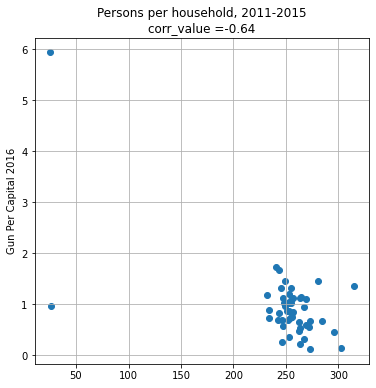

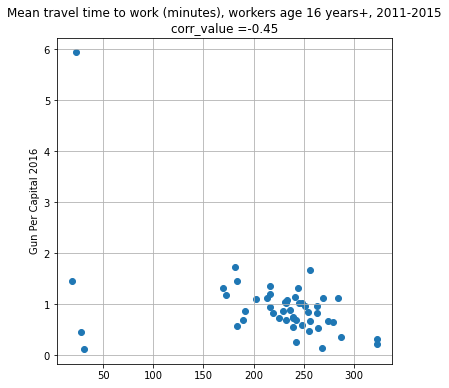

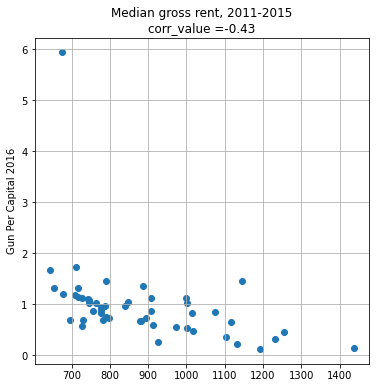

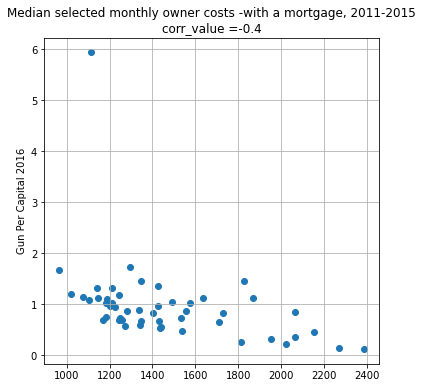

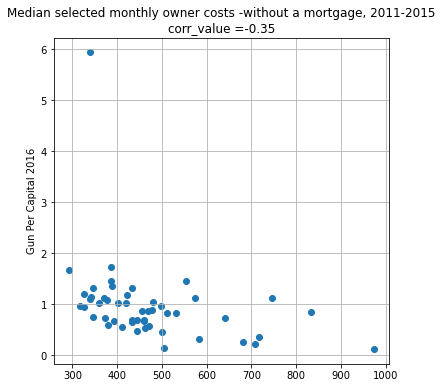

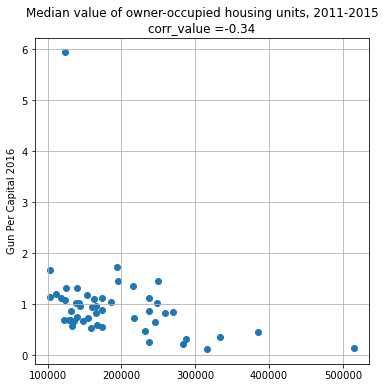

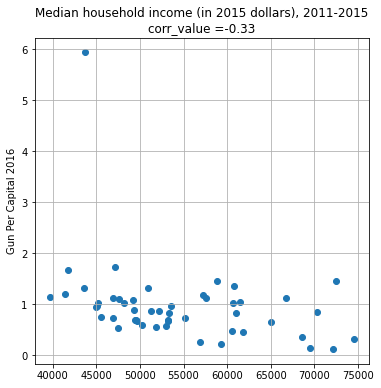

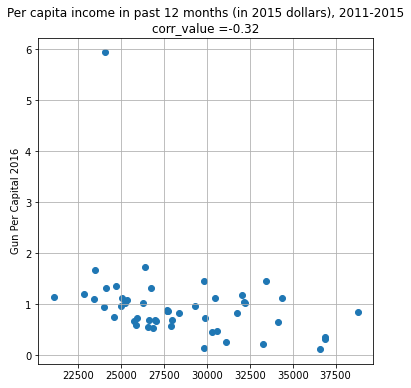

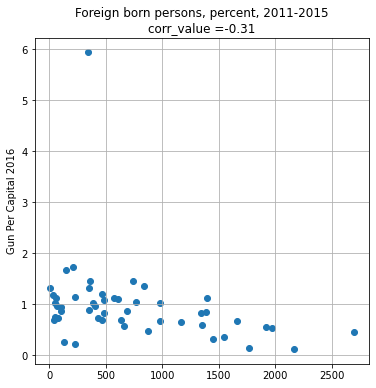

In [53]:
for col in a:
    plt.figure(figsize=(6, 6))
    i += 1
    plt.scatter(dfcenusT[col],dfcenusT['Gun_Capital_till_2016'], label =col)
    plt.ylabel("Gun Per Capital 2016")
    corr_value_withcol = corr_values[corr_values['census'] == col]['corr_value']
    #plt.title(col +'  corr_value =' + str(round(list(corr_value_withcol)[0] , 2)) )
    plt.title(col +'\ncorr_value =' + str(round(list(corr_value_withcol)[0] , 2)))
    plt.grid(True)
    plt.show()


### Research Question 2: Which states have had the highest growth in gun registrations?
to answer this question we need to
* Groupby year, state and sum of totals
* get The amount of registed guns from start to end 

and that wasn't to accurate to leave so we needed to get guns registred per pop increased and we only have 2016 and 2010 pop and that what we gonna work with we will 


* get The amount of registed guns from 2010 to 2016

* plot every one to see throw 

In [54]:
# Groupby year, state and sum of totals
gun_alltime = df_gun.groupby(['year', 'state'])['totals'].sum()

In [55]:
# The amount of registed guns from start to end 
gun_total_growth = gun_alltime.loc[df_gun['year'].max()] - gun_alltime.loc[df_gun['year'].min()]
gun_total_growth =  gun_total_growth.to_frame()
gun_total_growth = gun_total_growth.reset_index()
#gun_total_growth = gun_total_growth.set_index(['state',])
gun_total_growth.sort_values(by = ["totals"], ascending = False, inplace= True )
gun_total_growth.head(5)

,state,totals
18,Kentucky,3386107
14,Illinois,1122468
4,California,1100083
46,Texas,992572
9,Florida,880424


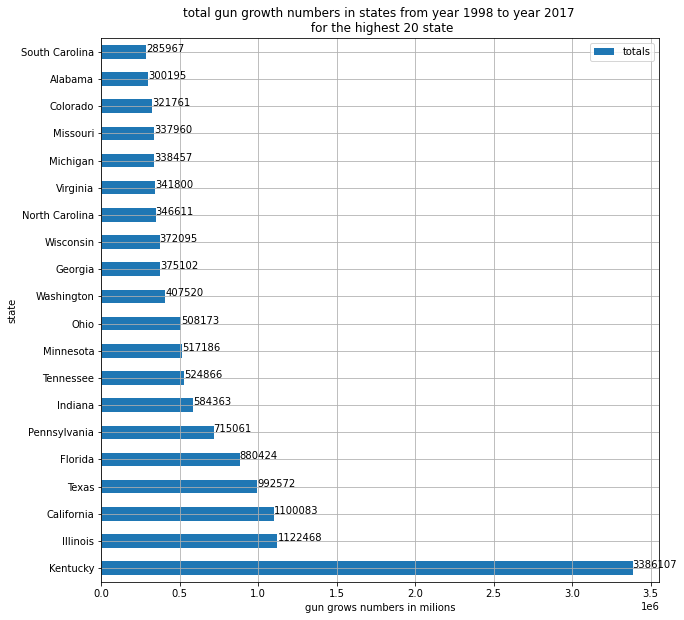

In [56]:
gun_total_growth.head(20).set_index(['state',]).plot.barh(figsize=(10, 10))
plt.title('total gun growth numbers in states from year 1998 to year 2017 \n for the highest 20 state')
plt.xlabel('gun grows numbers in milions')
plt.grid(True)
y= []
for i, v in gun_total_growth.head(20).iterrows():
    y.append(v['totals'])
    
for index, value in enumerate(y):
    plt.text(value, index, str(value))
    
plt.show()

 what is kintaki and kentucky have in common? 
 they both can kill people 
>that might be not so professional (not the joke i am ok with it) i mean that they have 3.3 m registrations and i think that will have some relation with growth i will try to make one more step 

* pop deff from 2010 to 2016
* gun growth from 2010 to 2016 and see 

In [57]:
# The amount of registed guns from 2010 to 2016
gun_10_16_growth = gun_alltime.loc[2016] - gun_alltime.loc[2010]
gun_10_16_growth =  gun_10_16_growth.to_frame()
gun_10_16_growth = gun_10_16_growth.reset_index()
#gun_total_growth = gun_total_growth.set_index(['state',])
gun_10_16_growth.sort_values(by = ["totals"], ascending = False, inplace= True )
gun_10_16_growth.head()

,state,totals
4,California,1560768
18,Kentucky,1291268
14,Illinois,1228770
15,Indiana,1091075
9,Florida,875993


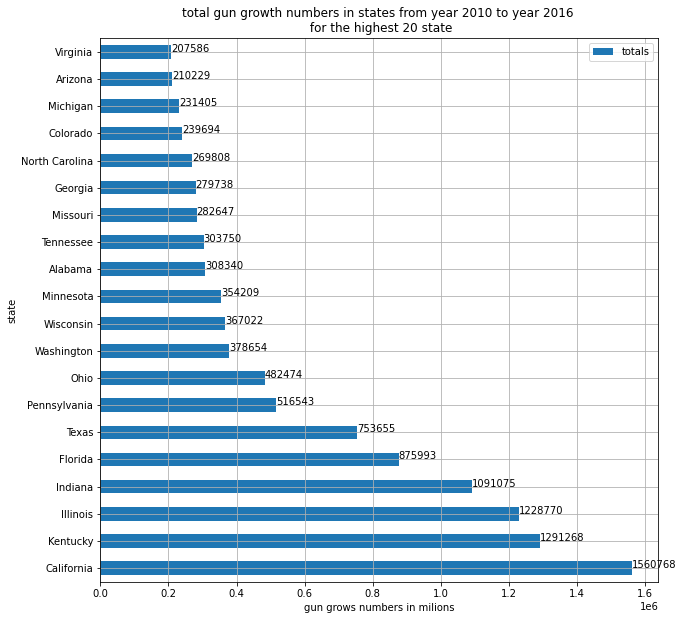

In [58]:
#plot it 
gun_10_16_growth.head(20).set_index(['state',]).plot.barh(figsize=(10, 10))
plt.title('total gun growth numbers in states from year 2010 to year 2016 \n for the highest 20 state')
plt.xlabel('gun grows numbers in milions')
plt.grid(True)
y= []
for i, v in gun_10_16_growth.head(20).iterrows():
    y.append(v['totals'])
    
for index, value in enumerate(y):
    plt.text(value, index, str(value))
    
plt.show()

In [59]:
#pop deff from 2010 to 2016
dfcenusT['pop_growth_from_2010_to_2016'] = dfcenusT['pop in 2016'] - dfcenusT['pop in 2010']
gun_10_16_growth = gun_10_16_growth.merge(dfcenusT[['state', 'pop_growth_from_2010_to_2016']], on='state', how='inner')
gun_10_16_growth['gun_per_pop'] = gun_10_16_growth['totals'] / gun_10_16_growth['pop_growth_from_2010_to_2016']

In [60]:
# The amount of registed guns from lastest substract the earliest
#gun_total_growth = gun_total_growth.set_index(['state',])
gun_10_16_growth.sort_values(by = ["gun_per_pop"], ascending = False, inplace= True )
gun_10_16_growth.head(5)

,state,totals,pop_growth_from_2010_to_2016,gun_per_pop
24,Connecticut,138097,2338.0,59.066296
38,Maine,45594,3115.0,14.636918
1,Kentucky,1291268,97630.0,13.226140
3,Indiana,1091075,148917.0,7.326732
6,Pennsylvania,516543,81370.0,6.348077


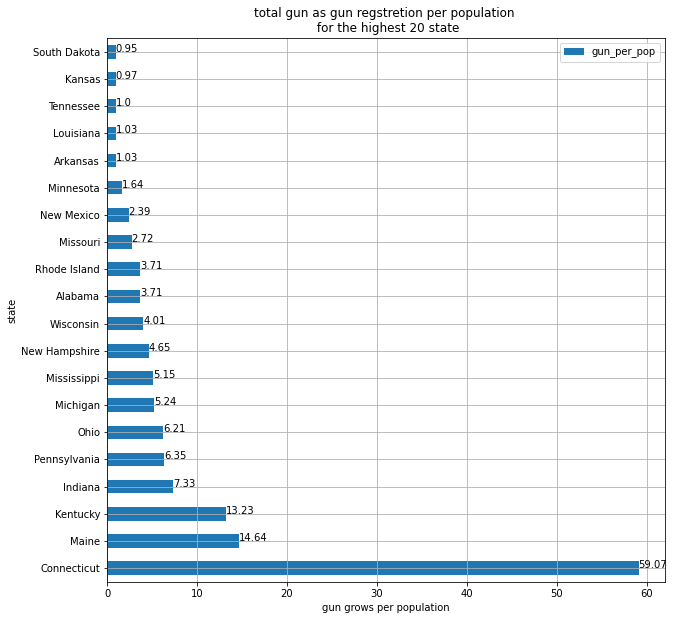

In [61]:
#plot it 
gun_10_16_growth[['gun_per_pop','state']].head(20).set_index(['state',]).plot.barh(figsize=(10, 10))
plt.title('total gun as gun regstretion per population \n for the highest 20 state')
plt.xlabel('gun grows per population')
plt.grid(True)
y= []
for i, v in gun_10_16_growth[['gun_per_pop','state']].head(20).iterrows():
    y.append(round(v['gun_per_pop'] , 2))
    
for index, value in enumerate(y):
    plt.text(value, index, str(value))
    
plt.show()

now we talking kintaki(KFC) is the only one who is killing people now damn u SMOKY BBQ TWISTER BOX, moving on, as we can see now in fair comparison with growth in pop and growth on gun regestretion **connecticut** will come on top with **pop deff =2338** and **gun growth = 138097** while **kentucky** has **pop deff = 97630** and **gun growth = 1291268**

# Research Question 3: What is the overall trend of gun purchases?
that is very eazy question to answer we just need to 

* group by year (no state this time)
* plot it and see how the trend goes over years 

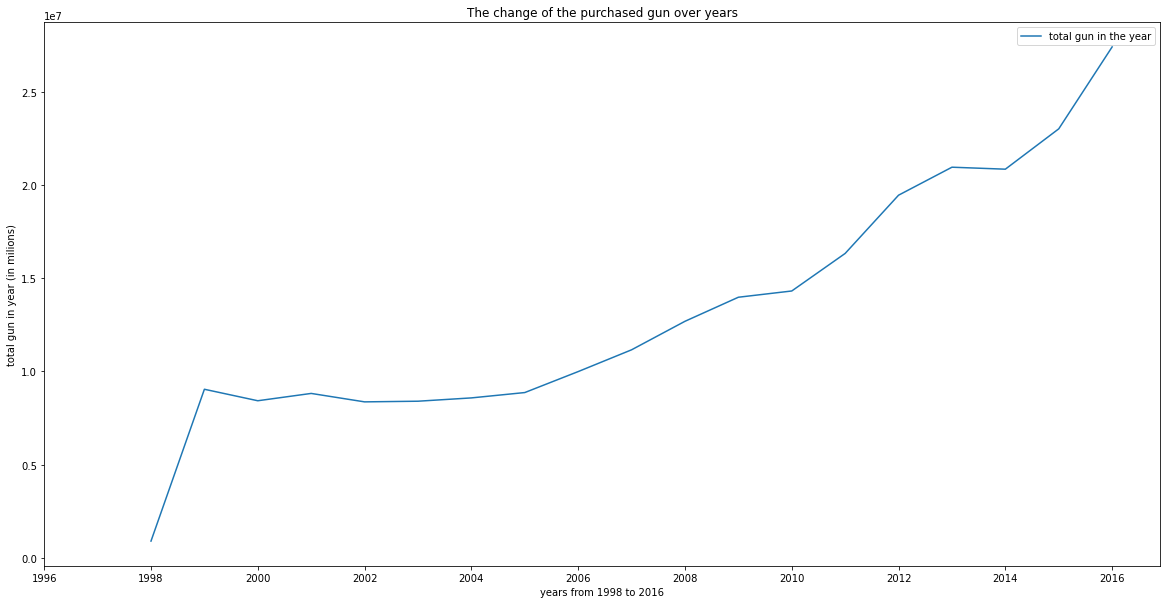

In [62]:
gun_trend = df_gun.groupby(['year'])['totals'].sum()
gun_trend = gun_trend.to_frame().drop(index = 2017)


gun_trend.plot(kind = 'line' , figsize=(20, 10))
plt.title('The change of the purchased gun over years')
plt.xlabel('years from 1998 to 2016')
plt.ylabel('total gun in year (in milions)')
plt.legend(['total gun in the year'])

plt.xticks(np.arange(1996,2017, step = 2))  # Set text labels.
plt.show()

it apears the over all of gun purchases is increasing over years, the value from 1998 to 1999 is desceptive one becuz it's not actually 0 it's just have 0 values there so i prefer to start from after it.

#### there is another way to look at the rending though and it's total math

it's using the slop of the line 

In [66]:
gun_trend = gun_trend.drop(index = [1998])
#lets creat slop data frame to see 
gun_trend_totals = np.round(
    np.array(
        list(gun_trend['totals'])
            ) / 10**7 , 2
                            )
years = np.arange(1999,2017, step = 1)
data = []
i = 0
for i in range(len(list(gun_trend['totals']))-1):
    data.append(
    [ (str(years[i]) + ' to ' + str(years[i+1])) , gun_trend_totals[i+1] , gun_trend_totals[i]  
    ]
                )
    i += 1 
gun_trend_slope = pd.DataFrame(data, columns = ['Years', 'year_berfor', 'year_after'])
gun_trend_slope['slope'] = gun_trend_slope['year_berfor'] - gun_trend_slope['year_after']
gun_trend_slope

,Years,year_berfor,year_after,slope
0,1999 to 2000,0.84,0.90,-0.06
1,2000 to 2001,0.88,0.84,0.04
2,2001 to 2002,0.84,0.88,-0.04
3,2002 to 2003,0.84,0.84,0.00
4,2003 to 2004,0.86,0.84,0.02
5,2004 to 2005,0.89,0.86,0.03
6,2005 to 2006,1.00,0.89,0.11
7,2006 to 2007,1.12,1.00,0.12
8,2007 to 2008,1.27,1.12,0.15
9,2008 to 2009,1.40,1.27,0.13


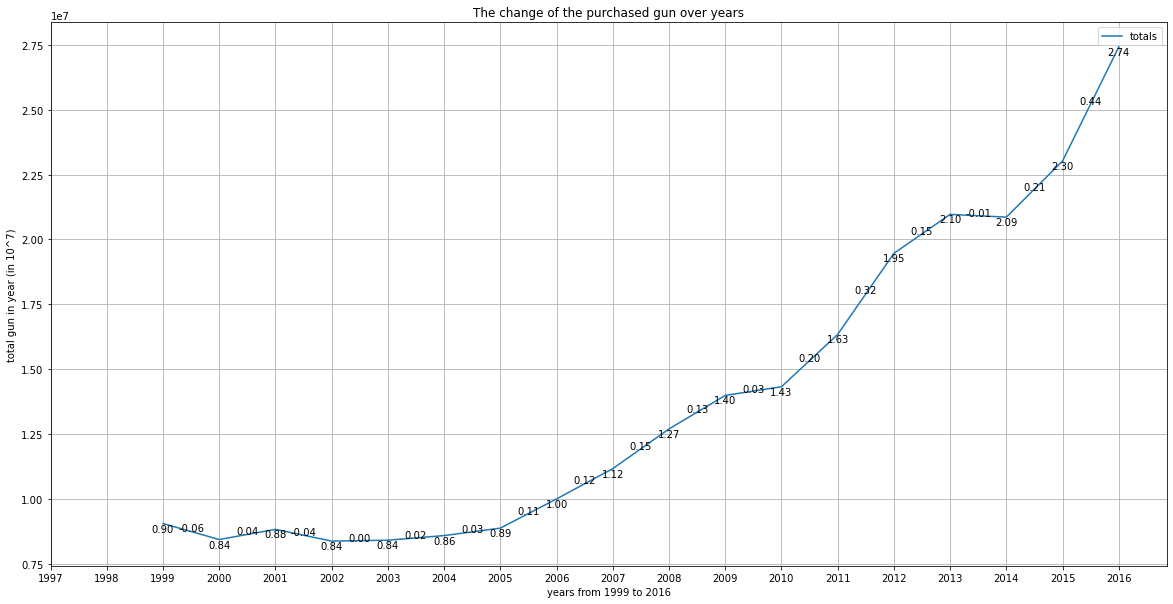

In [326]:
gun_trend.plot(kind = 'line' , figsize=(20, 10))
plt.title('The change of the purchased gun over years')
plt.xlabel('years from 1999 to 2016')
plt.ylabel('total gun in year (in 10^7)')
# plt.legend(['total gun in the year'])
plt.grid(True)
plt.xticks(np.arange(1997,2017, step = 1))  # Set text labels.
xs = list(np.arange(1999,2017, step = 1))
ys = list(gun_trend['totals']/10**7)
ss = list(gun_trend_slope['slope'])

for x,y in zip(xs,ys):
    label = "{:.2f}".format((y))
    plt.annotate(label, # this is the text
                 (x, y*10**7), # this is the point to label
                 textcoords='offset points', # how to position the text
                 xytext=(0,-8), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x,y,s in zip(xs[:-1],ys[:-1],ss):
    label2 = "{:.2f}".format((s))
    plt.annotate(label2, # this is the text
                 ((x+.5) , y*10**7 + s*10**7/2 ), # this is the point to label
                 textcoords='offset points', # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                 ha='center')
plt.show()

that's more convincing value actually and it's apear the i was wrong 

the over all trend of gun purchases is increasing but, it also apear that it's not constantly increasing as it apears that it started to get really increasing from year 2005, and doubled the increasing rate after 2014.

# Research Question 4: is there is a relationship betweet the month and the guns bought?
onother eazy one we just need to 

* group by month this time 
* plot it and see the biggest 

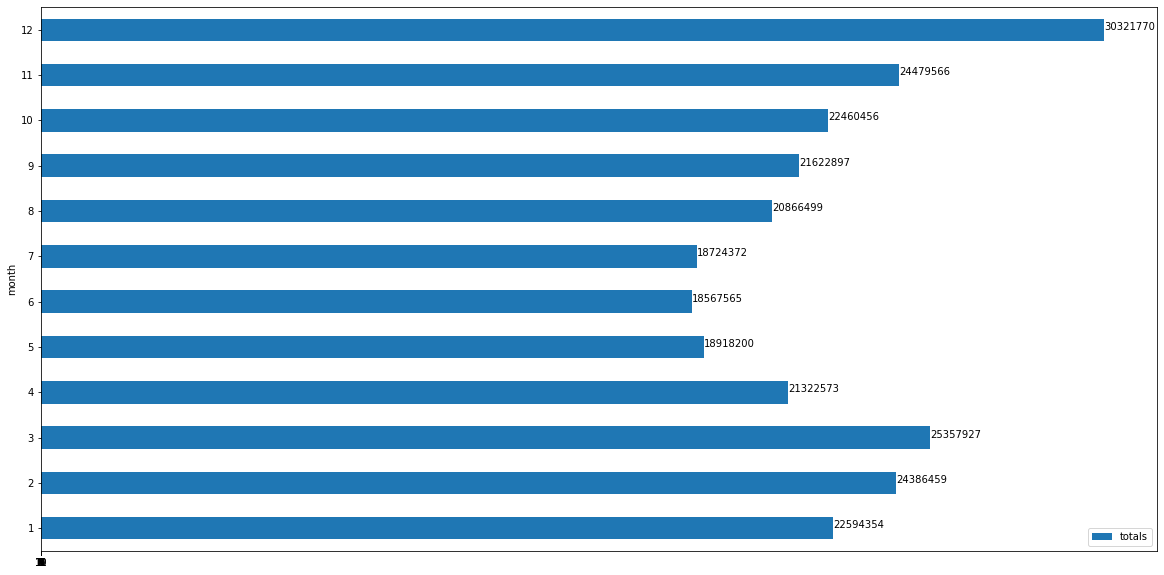

In [62]:
# gun_trend_month
gun_trend_month = df_gun.groupby(['month'])['totals'].sum()
gun_trend_month = gun_trend_month.to_frame()

gun_trend_month.plot(kind = 'barh' , figsize=(20, 10))
y= []
for i, v in gun_trend_month.iterrows():
    y.append(round(v['totals'] ,))
    
for index, value in enumerate(y):
    plt.text(value, index, str(value))
       
plt.xticks(np.arange(0,13, step = 1))  # Set text labels.
plt.show()

most gun regestration in month apears to be in December, maybe people love to celebrate Christmas with guns and i cant see why this true to leak of data

<a id='conclusions'></a>
## Conclusions

> **results**
1. best census associated with is **high gun per capita** is **Persons per household, 2011-2015** and it's for surprise is **negative** correlation.
2. there is no other good census associated enough with **high gun per capita**.
3. **kentucky** has the most gun growth numbers but, **connecticut** has the most gun growth numbers **per population**.
4. the over all trend of gun purchases is increasing over years .
5. it  apear that **trend** of gun purchases is't constantly increasing as it apears that it started to get really increasing from year **2005**, and **doubled** the increasing rate after **2014**.
6. most gun **regestration** in month apears to be in **December**.


> **limitations**
1. leak of data in compare to **months** didn't allow me to see why december is the most month people by guns.
2. data was seperated which could affect the process of analysis.
3. there are missing data for U.S colonies such as **Puerto Rico**, **Guam**, and others in **census data**.
4. the gun data contains many **outliers**.

# plz 
any suggestions of how to improve the exploration well help me to get better over time and i will be happy to hear from u 
